# PDF Reader App

Now that our model is ready to be applied to large texts and not only short sentences it is time to develop a **PDF file reader** to extract the **relevant information** from the desired files and **apply the model** to check whether or not our it can summarise our documents properly.

In order to read these files we will be using the **PDF parser** of the **tika** library and we will "Fine Tune" it with the **2030 Agenda** (using *RegEx*). Once the PDF reader is ready we will check its first and last paragraphs to see how good it is.

## Environment

### Libraries

In [1]:
# Base libraries
import os
import pandas as pd
import regex as re

# Visualization
from IPython.display import Markdown, display

# PDF Parser
from tika import parser
import pdfkit

### Available Reports

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Path and "GUI" dataframe to have an easier way to play with the results
reports_path = 'Reports/'
reports = {report.split(".")[0].lower().replace(' ', '_'): reports_path + report for report in os.listdir(reports_path)}
available_reports = pd.DataFrame(reports, index=[0]).T.reset_index().rename(columns={'index':'report', 0:'path'})
display(Markdown(available_reports.to_markdown()));

|    | report                              | path                                            |
|---:|:------------------------------------|:------------------------------------------------|
|  0 | agenda_2030                         | Reports/Agenda 2030.pdf                         |
|  1 | eu_neighbourhood_policy             | Reports/EU Neighbourhood Policy.pdf             |
|  2 | paris_agreement                     | Reports/Paris Agreement.pdf                     |
|  3 | unesco_historic_building_landscapes | Reports/Unesco Historic Building Landscapes.pdf |

### Functions

In [2]:
def parse_text(text, 
              remove_chars=['+', '!', '*', '/'], 
              special_backwards=['&'], 
              duplicate_chars={'\.': 2, '\n': 5, ' ': 2}):
    
    callback_uppercase = lambda pat: pat.group(0)[0] + ' '
    callback_special = lambda pat: pat.group(0)[0] 
    join_pages = lambda pat: ''.join([char for char in pat.group(0) if char != '\n'])

    
    # Remove error uppercase immediatly after lowercase - number
    text = re.sub(r'([a-z]|[0-9])[A-Z]', callback_uppercase, text)
    
    # Remove unnecesary characters
    for char in remove_chars:
        text = text.replace(char, ' ')
        
    # Remove bad positioned special characters
    for char in special_backwards:
        text = re.sub(r'.(&){,}', callback_special, text)
        
    # Remove duplicate
    for char, occurrences in duplicate_chars.items():
        pattern = f'({char})' + '{' + str(occurrences) + ',}'
        text = re.sub(eval(r"f'{pattern}'"), ' ', text)
        
    # Join pages
    text = re.sub(r'[a-zA-Z|,|;] (\n)+[a-zA-Z]', join_pages, text)
    
    # Extra refinement for joining pages
    text = re.sub(r'[a-zA-Z0-9|,|;] ?(\n)[a-zA-Z0-9]', ' ', text)
    
    return text.strip()


def process_pdf(filename, 
                min_sentence_length=5, 
                **kwargs):
    
    text = parser.from_file(filename)["content"]
    processed_text = parse_text(text, **kwargs)
    processed_list = [i.strip() for i in processed_text.split('\n') if len(i.split(' ')) >= min_sentence_length]
    
    return {'processed_text': processed_text, 'processed_list': processed_list}


def write_pdf(text, tmp_filename='tmp.html', pdf_tmp_filename='tmp.pdf'):
    
    with open (tmp_filename, "w") as output:        
        output.write(text.replace("\n", "<br>"))

    pdfkit.from_file(tmp_filename, pdf_tmp_filename, configuration=config)

## Results

### Agenda 2030 

In [4]:
agenda_2030 = process_pdf("Reports/Agenda 2030.pdf")

2022-04-02 21:11:45,958 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


#### Start (First 3 Pages)

##### First Page

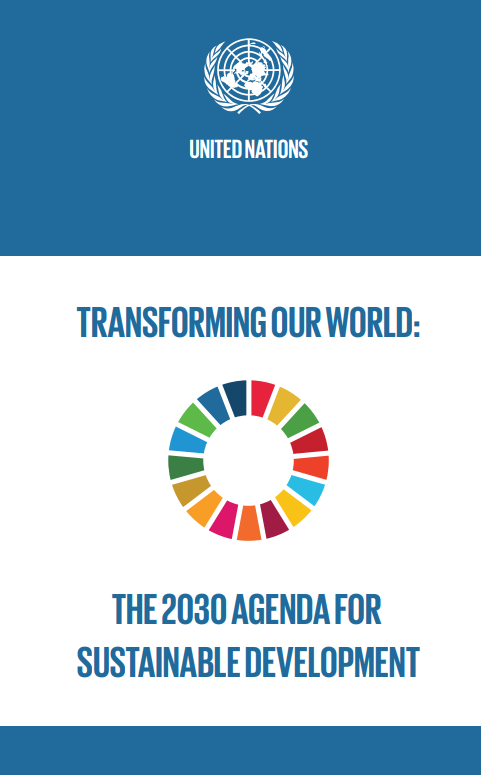

##### Rendered Text

In [5]:
print('\n'.join(agenda_2030["processed_text"].split('\n')[:5]))

TRANSFORMING OUR WORLD:

THE 2030 AGENDA FOR SUSTAINABLE DEVELOPMENT

UNITED NATIONS


##### Second Page

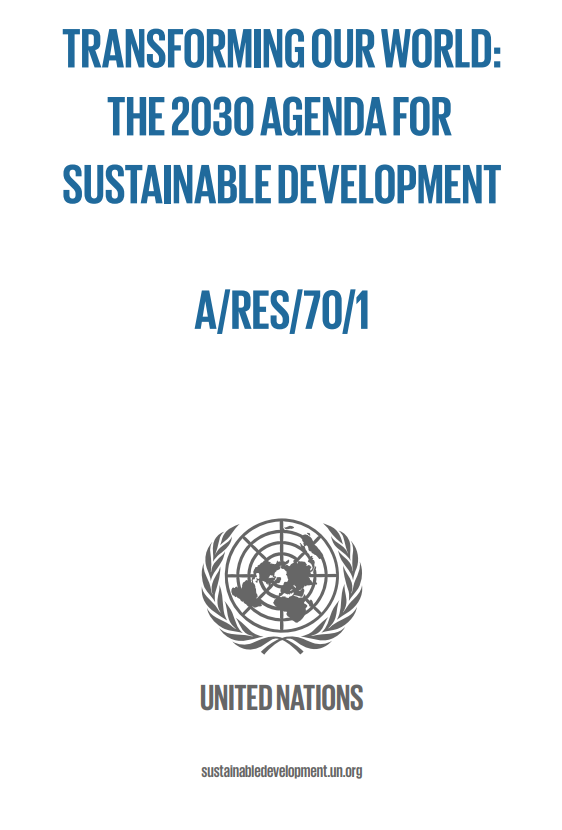

##### Rendered Text

In [6]:
print('\n'.join(agenda_2030["processed_text"].split('\n')[8:16]))

UNITED NATIONS

TRANSFORMING OUR WORLD:
THE 2030 AGENDA FOR SUSTAINABLE DEVELOPMENT

sustainabledevelopment.un.org

A RES 70 1


##### Third Page

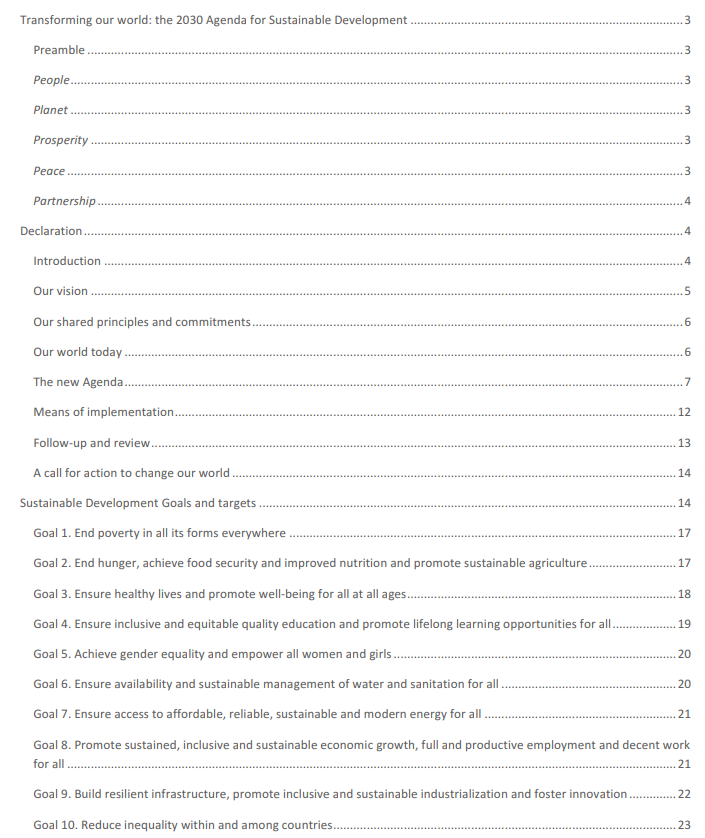

##### Rendered Text

In [7]:
print('\n'.join(agenda_2030["processed_text"].split('\n')[19:72]))

Transforming our world: the 2030 Agenda for Sustainable Development 3 

Preamble 3 

People 3 

Planet 3 

Prosperity 3 

Peace 3 

Partnership 4 

Declaration 4 

Introduction 4 

Our vision 5 

Our shared principles and commitments 6 

Our world today 6 

The new Agenda 7 

Means of implementation 12 

Follow up and review 13 

A call for action to change our world 14 

Sustainable Development Goals and targets 14 

Goal 1. End poverty in all its forms everywhere 17 

Goal 2. End hunger, achieve food security and improved nutrition and promote sustainable agriculture 17 

Goal 3. Ensure healthy lives and promote well being for all at all ages 18 

Goal 4. Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all 19 

Goal 5. Achieve gender equality and empower all women and girls 20 

Goal 6. Ensure availability and sustainable management of water and sanitation for all 20 

Goal 7. Ensure access to affordable, reliable, sustainable and mode

#### End (Last 3 Pages)

##### Page 39

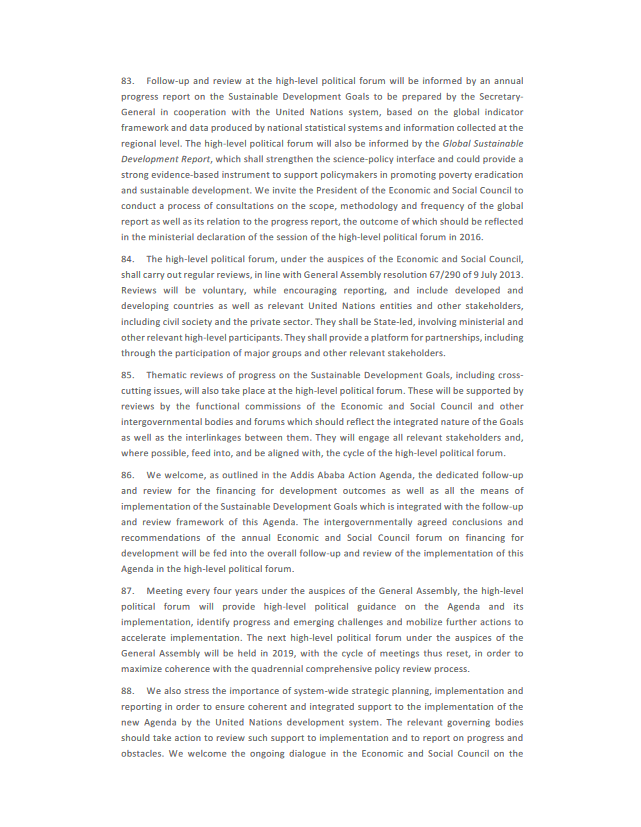

##### Rendered Text

In [8]:
print('\n'.join(agenda_2030["processed_text"].split('\n')[-35: -23]))

83. Follow up and review at the high level political forum will be informed by an annual progress report on the Sustainable Development Goals to be prepared by the Secretary General in cooperation with the United Nations system, based on the global indicator framework and data produced by national statistical systems and information collected at the regional level. The high level political forum will also be informed by the Global Sustainable Development Report, which shall strengthen the science policy interface and could provide a strong evidence based instrument to support policymakers in promoting poverty eradication and sustainable development. We invite the President of the Economic and Social Council to conduct a process of consultations on the scope, methodology and frequency of the global report as well as its relation to the progress report, the outcome of which should be reflected in the ministerial declaration of the session of the high level political forum in 2016. 

84. 

##### Page 40

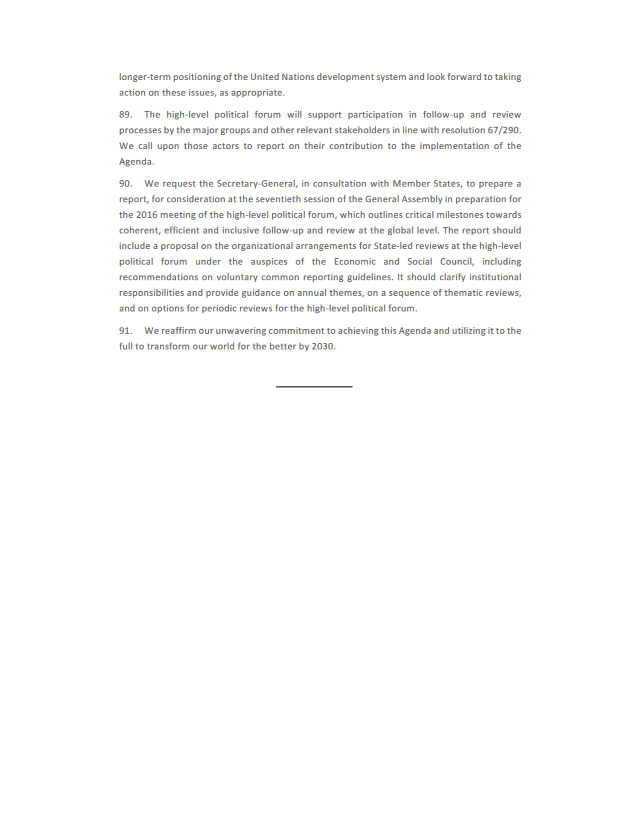

##### Rendered Text

In [9]:
print('\n'.join(agenda_2030["processed_text"].split('\n')[-23: -16]))


89. The high level political forum will support participation in follow up and review processes by the major groups and other relevant stakeholders in line with resolution 67 290. 
We call upon those actors to report on their contribution to the implementation of the Agenda. 

90. We request the Secretary General, in consultation with Member States, to prepare a report, for consideration at the seventieth session of the General Assembly in preparation for the 2016 meeting of the high level political forum, which outlines critical milestones towards coherent, efficient and inclusive follow up and review at the global level. The report should include a proposal on the organizational arrangements for State led reviews at the high level political forum under the auspices of the Economic and Social Council, including recommendations on voluntary common reporting guidelines. It should clarify institutional responsibilities and provide guidance on annual themes, on a sequence of thematic rev

##### Page 41

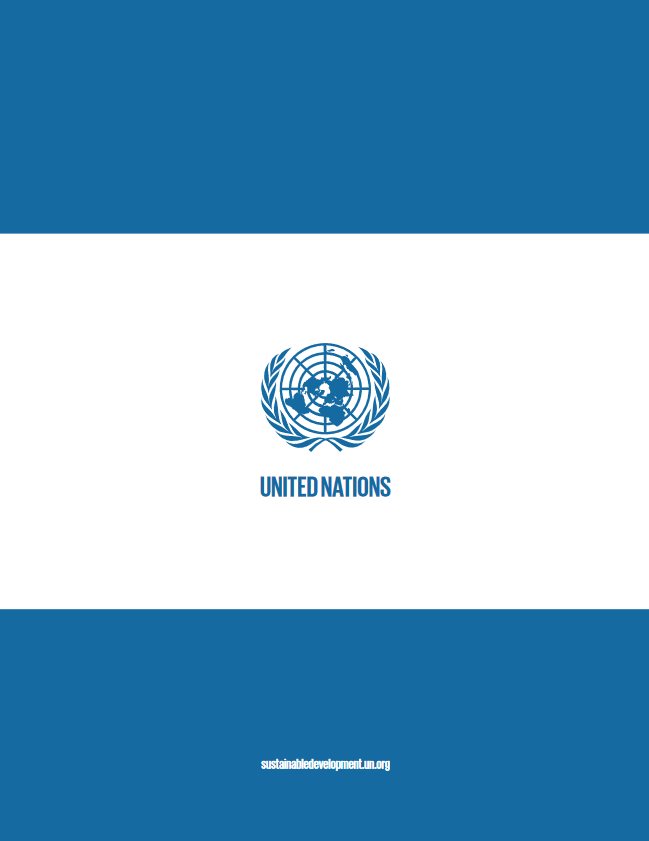

##### Rendered Text

In [10]:
print('\n'.join(agenda_2030["processed_text"].split('\n')[-9:]))

UNITED NATIONS

sustainabledevelopment.un.org


	Front copy
	Second page copy
	Content
	Back copy


#### Conclusion

The order of some sentences is **switched**, but this doesn't matter as long as **we are not considering the position** of the sentences in our project, just the overall **topic** (*most similar indicators*) the text is about. Overall it works **very well** as it is able to **extract all the text** without almost any error.

It is true that we might have some **artifacts** when applying our *PDF app* like in the **last page**, but it is also true that this kind of tasks are **very complicated** to perform as the PDFs might not be **structured properly**, so overall this is a **very good result**.

## Model Application to the extracted report (Agenda 2030)

In [11]:
from model import robust_sentence_top_matches

In [12]:
agenda_2030_sentences = pd.Series([agenda_2030["processed_text"].split('\n')][0]).drop_duplicates()
top_agenda_2030_matches = robust_sentence_top_matches(agenda_2030_sentences)

In [13]:
agenda_2030_df = agenda_2030_sentences.reset_index(name='sentence').merge(top_agenda_2030_matches, 
                                                                          left_on='sentence', 
                                                                          right_index=True)

agenda_2030_df = agenda_2030_df.drop(columns='index').set_index('sentence')

### Start

In [14]:
display(Markdown(agenda_2030_df[:5].to_markdown()))

| sentence                                                              | top_match_0                                    | top_match_1                                                     | top_match_2                                 | top_match_3                                             | top_match_4                                 |   similarity_0 |   similarity_1 |   similarity_2 |   similarity_3 |   similarity_4 |
|:----------------------------------------------------------------------|:-----------------------------------------------|:----------------------------------------------------------------|:--------------------------------------------|:--------------------------------------------------------|:--------------------------------------------|---------------:|---------------:|---------------:|---------------:|---------------:|
| TRANSFORMING OUR WORLD:                                               | Innovating Practice                            | View-leading elements                                           | State of the building                       | Change of man-made structures                           | Innovative Urban Solutions                  |       0.604731 |       0.554976 |       0.541263 |       0.524136 |       0.508857 |
| THE 2030 AGENDA FOR SUSTAINABLE DEVELOPMENT                           | Long–term management                           | Total hedgerow length                                           | Annual average concentration of PM10 (g/m3) | Household spending >30% on housing                      | Daily water consumption p.p. year           |       0.479829 |       0.479758 |       0.444936 |       0.413072 |       0.407396 |
| A RES 70 1                                                            | Castles                                        | Croft within the manor territory                                | Noise                                       | Number of livestock, herds or farm animals              | Proportion of people 65 years and over      |       0.573018 |       0.569202 |       0.520043 |       0.489645 |       0.46808  |
| Transforming our world: the 2030 Agenda for Sustainable Development 3 | Household spending >30% on housing             | Proportion of households where housing costs are 30% of income; | Renovation and new constructions            | Number of days ozone O3 concentrations exceed 120 μg/m3 | Annual average concentration of PM10 (g/m3) |       0.535862 |       0.508715 |       0.507832 |       0.488499 |       0.44715  |
| Our vision 5                                                          | Share of blocks served by Green Space > 0.5 ha | Share of population served by Green Space > 0.5 ha              | Degree of unobstructed view                 | Leisure                                                 | Green space                                 |       0.644189 |       0.60795  |       0.590925 |       0.49638  |       0.490607 |

### Sample 

In [15]:
display(Markdown(agenda_2030_df.sample(5, random_state=42).to_markdown()))

| sentence                                                                                                                                                                                                                                   | top_match_0                          | top_match_1                                       | top_match_2                       | top_match_3                                   | top_match_4                      |   similarity_0 |   similarity_1 |   similarity_2 |   similarity_3 |   similarity_4 |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------|:--------------------------------------------------|:----------------------------------|:----------------------------------------------|:---------------------------------|---------------:|---------------:|---------------:|---------------:|---------------:|
| (Addis Ababa Action Agenda), adopted by the General Assembly on 27 July 2015 (resolution 69 313).                                                                                                                                          | Arable field indicator               | Large solitary oaks in grazing or arable land     | Commodifcation                    | Total hedgerow length                         | Amenities                        |       0.690785 |       0.454624 |       0.438512 |       0.424062 |       0.423163 |
| National level 36                                                                                                                                                                                                                          | Size                                 | Equality and diversity                            | Leisure                           | The age of land                               | Sharing mode                     |       0.461788 |       0.461424 |       0.457092 |       0.430795 |       0.41551  |
| Goal 4. Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all 19                                                                                                                            | Opportunity for higher education     | Access to high quality education                  | Education level of the population | Education attainment                          | Level of qualification/education |       0.672263 |       0.644051 |       0.610074 |       0.597002 |       0.587891 |
| Data, monitoring and accountability                                                                                                                                                                                                        | Process transparency                 | Management and action plan                        | Reliability                       | Events successfully implemented and evaluated | Clear strategy                   |       0.643072 |       0.58831  |       0.5876   |       0.587411 |       0.513409 |
| One in which development and the application of technology are climate sensitive, respect biodiversity and are resilient. One in which humanity lives in harmony with nature and in which wildlife and other living species are protected. | Nature Conservation and Biodiversity | Biodiversity and Habitat Conservation/Restoration | Areas of protected natural spaces | Protection of culturally important species    | Well-preserved village           |       1.327    |       1.26742  |       1.24665  |       1.19452  |       1.18551  |

### End

In [16]:
display(Markdown(agenda_2030_df[-5:].to_markdown()))

| sentence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | top_match_0                                                        | top_match_1                              | top_match_2                                                         | top_match_3                                                                         | top_match_4                                                                              |   similarity_0 |   similarity_1 |   similarity_2 |   similarity_3 |   similarity_4 |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------|:-----------------------------------------|:--------------------------------------------------------------------|:------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------|---------------:|---------------:|---------------:|---------------:|---------------:|
| 89. The high level political forum will support participation in follow up and review processes by the major groups and other relevant stakeholders in line with resolution 67 290.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | Institutional management of International fests or expert meetings | Consultation and Engagement              | Type of information given to visitors before and during site visits | Monitoring contractors Health, safety and enivironmental performance                | Citizens participation in Health, safety and enivironmental public programs and meetings |       0.446354 |       0.430641 |       0.410566 |       0.4012   |       0.393802 |
| We call upon those actors to report on their contribution to the implementation of the Agenda.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | Management and action plan                                         | Implementation of activities in the area | Participatory master plan                                           | Events successfully implemented and evaluated                                       | Planning policies and legislations                                                       |       0.756497 |       0.711103 |       0.689533 |       0.652875 |       0.585839 |
| 90. We request the Secretary General, in consultation with Member States, to prepare a report, for consideration at the seventieth session of the General Assembly in preparation for the 2016 meeting of the high level political forum, which outlines critical milestones towards coherent, efficient and inclusive follow up and review at the global level. The report should include a proposal on the organizational arrangements for State led reviews at the high level political forum under the auspices of the Economic and Social Council, including recommendations on voluntary common reporting guidelines. It should clarify institutional responsibilities and provide guidance on annual themes, on a sequence of thematic reviews, and on options for periodic reviews for the high level political forum. | Clear strategy                                                     | Meeting points                           | Design Review                                                       | Management and action plan                                                          | Type of information given to visitors before and during site visits                      |       3.95455  |       3.51169  |       3.33998  |       3.00161  |       2.43813  |
| 91. We reaffirm our unwavering commitment to achieving this Agenda and utilizing it to the full to transform our world for the better by 2030.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | Events successfully implemented and evaluated                      | Long–term management                     | Reliability                                                         | Strategies and infrastructure for timely data communication, sharing, and reporting | Lifelong learning                                                                        |       0.545231 |       0.484657 |       0.480074 |       0.444722 |       0.441188 |
| Second page copy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               | CO2 factors (electricity and heat)                                 | Secondary school                         | CO2 EMISSIONS                                                       | Percentage of population with secondary-level education                             | Per capita volume of industrial SO 2 emissions                                           |       0.615285 |       0.605295 |       0.580617 |       0.540318 |       0.460585 |

In [17]:
agenda_2030_similarities = agenda_2030_df.select_dtypes(float).columns
agenda_2030_df[agenda_2030_similarities] = agenda_2030_df[agenda_2030_similarities].astype(str).applymap(lambda x: x.replace('.', ',')[:6])
agenda_2030_df.to_csv("Processed Reports/agenda_2030_df.csv")

In [18]:
#!jupyter nbconvert "PDF Reader" --to html_toc --TemplateExporter.exclude_input=True -TagRemovePreprocessor.remove_cell_tags="hide" 

In [20]:
process_pdf('../../Downloads/4xNotes.pdf')

2022-07-10 03:41:35,783 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to C:\Users\javid\AppData\Local\Temp\tika-server.jar.
2022-07-10 03:41:44,882 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to C:\Users\javid\AppData\Local\Temp\tika-server.jar.md5.
2022-07-10 03:41:45,330 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


{'processed_text': 'A1 Catalogue\n\n\n15\n\n1070 PROTECTION\n\nP T\n\nE I\n\n \n\nPROTECTIO ODEL CC YEAR\n\nALUMINIU ADIATOR GUARD\n\nNOTE TC MOTOCROS NGINE GUARD\n\nDTC ENDUR NGINE GUARD\n\nDTC REA ISC GUARD\n\nHONDA\n\nCR125 125 02-07 2-CP09200640300\n\nCRF150 150 07-1 -CP0600113000 -CP06001130007\n\n2-CP0790113030 -CP07901130500\n\nCRF150 B BIG WHEEL 150 07-1 -CP0600113000 -CP06001130007\n\n2-CP0790113030 -CP07901130500\n\nCR250 250 02-0 -CP0600091000 -CP06000910007\n\n2-CP09200640300\n\nCRF250 250 04-05 2-CP09200640300\n\nCRF250 250 06-0 -CP0600005000 -CP06000050007\n\n2-CP09200640300\n\nCRF250 250 10-1 -CP0600064000 -CP06000640007\n\n2-CP0790064030 -CP07900640500\n\n2-CP0850075030 -CP08500750500\n\n2-CP09200640300\n\nCRF250 250 201 -CP0600126000 -CP06001260007\n\n2-CP09200640300\n\nCRF250 250 15-1 -CP0600143000 -CP06001430007\n\n2-CP09200640300\n\nCRF250 250 201 -CP0600185000 -CP06001850007\n\n2-CP0790185030 -CP07901850500\n\n2-CP0850185030 -CP08501850500\n\nCRF250 250 04-1 -CP060

In [21]:
text = _.copy()

In [30]:
print(text['processed_list'][1])

CRF150 150 07-1 -CP0600113000 -CP06001130007
